### Libras Detection with Mediapipe and NN Classifier Tensorflow

# Libras (PTBR Hand Signal Language) Recognition 

* Proposed Solution: Use Google's Mediapipe Hands Detection to detect hands position and apply it to a image dataset for
Libras hand signals. This will generate a class - fingers coordinates dataset that can be used to train a simple NN Classifier
to recognize those signals. This is useful in order to avoid the computation of a image CNN, by only using a simple vector of coordinates
numbers, this method would be faster and requires much less processing, considering how fast Mediapipe hands detection already is.

* Advance: It's needed to make a better image dataset for the signals, with high quality and variety and also the addition of more signals.

* Advance: Use a set of frames instead a static image for hand signal classification, so it can be applied to signals that involve movement.

##### Refs:

* https://github.com/google/mediapipe

* I. L. O. Bastos, M. F. Angelo and A. C. Loula, "Recognition of Static Gestures Applied to Brazilian Sign Language (Libras)," 2015 28th SIBGRAPI Conference on Graphics, Patterns and Images, Salvador, 2015, pp. 305-312.


In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import cv2
import mediapipe as mp
from IPython.display import clear_output
import pandas as pd
import seaborn as sns

In [2]:
import sys
sys.path.append('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV')
import OpCV_Utils

In [3]:
hands_df = pd.read_csv('hands_dataframeV2')
hands_df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.0,0.530610,0.734979,0.687852,0.695875,0.772122,0.560489,0.777391,0.444213,0.785670,...,0.529562,0.619644,0.391117,0.545876,0.403106,0.496368,0.445098,0.573567,0.467922,0.626696
1,0.0,0.648609,0.859351,0.778897,0.797901,0.832064,0.652105,0.818550,0.546344,0.850461,...,0.638657,0.776330,0.464930,0.663796,0.510593,0.622864,0.560984,0.693026,0.587580,0.746618
2,0.0,0.361423,0.859630,0.224011,0.804758,0.173517,0.667868,0.179654,0.562697,0.152707,...,0.365145,0.773470,0.538554,0.669886,0.507316,0.643539,0.459220,0.710207,0.440000,0.761474
3,0.0,0.767182,0.829417,0.873378,0.738796,0.873948,0.582669,0.823329,0.485701,0.829521,...,0.724968,0.739878,0.517911,0.667061,0.545780,0.612058,0.618518,0.671339,0.660227,0.716618
4,0.0,0.483996,0.738014,0.326520,0.687574,0.235558,0.559320,0.221129,0.456594,0.203319,...,0.467640,0.639272,0.597188,0.538383,0.606877,0.498030,0.572900,0.572647,0.546903,0.626232


In [4]:
hands_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
5519,22.0,0.452892,0.767951,0.285967,0.723976,0.184587,0.610029,0.150849,0.501583,0.111035,...,0.434081,0.175976,0.542643,0.502806,0.531094,0.404197,0.522323,0.342373,0.506392,0.281392
5520,22.0,0.432227,0.740696,0.281444,0.688547,0.198018,0.569313,0.179485,0.461293,0.147546,...,0.501190,0.153831,0.564276,0.496475,0.570303,0.397713,0.567037,0.333620,0.554546,0.270134
5521,22.0,0.419700,0.726237,0.267481,0.672936,0.180569,0.553272,0.160604,0.445259,0.131577,...,0.480571,0.144432,0.544635,0.478019,0.548778,0.380653,0.546810,0.317598,0.537939,0.253990
5522,22.0,0.429639,0.728580,0.278688,0.673231,0.198177,0.554329,0.181830,0.446962,0.152764,...,0.510578,0.145176,0.566303,0.486365,0.574016,0.388670,0.574093,0.324889,0.565921,0.260220
5523,22.0,0.407073,0.708653,0.247779,0.658994,0.156692,0.540812,0.133933,0.431360,0.104008,...,0.449268,0.120249,0.524853,0.456078,0.524024,0.358732,0.521832,0.296278,0.512437,0.233410


In [5]:
hands_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
count,5524.000000,5524.000000,5524.000000,5524.000000,5524.000000,5524.000000,5524.000000,5524.000000,5524.000000,5524.000000,...,5524.000000,5524.000000,5524.000000,5524.000000,5524.000000,5524.000000,5524.000000,5524.000000,5524.000000,5524.000000
mean,11.101376,0.510605,0.656418,0.538087,0.627372,0.547490,0.563189,0.537631,0.519728,0.521368,...,0.493855,0.496978,0.468646,0.520928,0.467087,0.488542,0.474505,0.494273,0.478319,0.495993
std,6.690992,0.119445,0.163436,0.154196,0.136659,0.195257,0.093857,0.190486,0.086972,0.188134,...,0.116381,0.157408,0.145311,0.081374,0.148599,0.096217,0.139654,0.118768,0.141087,0.144869
min,0.000000,0.126202,0.136481,0.099217,0.168632,0.045703,0.266520,0.072024,0.196585,0.024200,...,0.081010,0.067712,0.024138,0.223238,-0.016084,0.210494,0.005983,0.166142,-0.033901,0.078244
25%,5.000000,0.438657,0.616812,0.414693,0.565259,0.385238,0.505535,0.376376,0.462526,0.373922,...,0.415426,0.406793,0.357786,0.469490,0.355669,0.423486,0.380184,0.407450,0.388683,0.397159
50%,11.000000,0.513294,0.702019,0.552220,0.661633,0.577084,0.565573,0.566651,0.513323,0.534240,...,0.497423,0.520980,0.459450,0.522636,0.458824,0.486802,0.475960,0.504909,0.482398,0.519641
75%,17.000000,0.585941,0.762923,0.662319,0.721282,0.708231,0.623797,0.692357,0.571759,0.667229,...,0.574175,0.606657,0.576489,0.571102,0.571677,0.554492,0.565427,0.583821,0.570646,0.607167
max,22.000000,0.900615,0.947711,0.924613,0.887620,0.956116,0.833413,0.939053,0.808089,0.962808,...,0.916708,0.879123,0.973941,0.835755,1.010086,0.835654,0.982577,0.828938,1.023257,0.820010


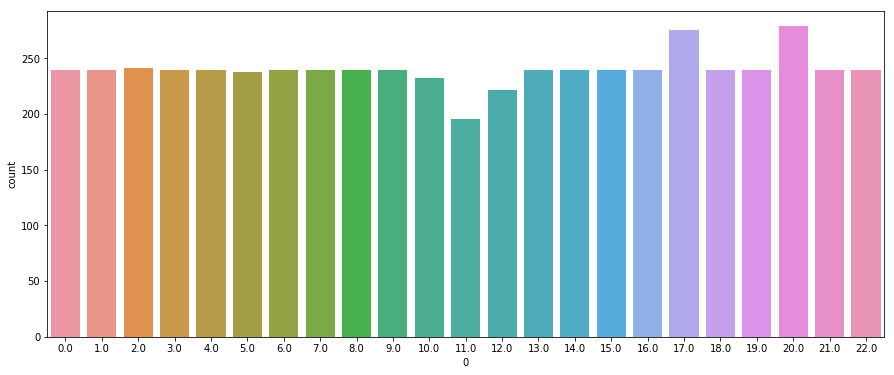

In [6]:
plt.figure(figsize=(15,6))
sns.countplot(hands_df['0'], label = 'Count');

In [7]:
########### Tensorflow Import ###########

import tensorflow as tf
from tensorflow.keras import layers, models

In [9]:
# NN Training Stopper Callback (after meeting desired condition)

class haltCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy')>=0.999):
            print('\n\n\nReached desired accuracy. Training canceled! \n\n\n')
            self.model.stop_training = True
            
trainingStopCallback = haltCallback()

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
                      filepath='libras_model_v1.keras',
                      save_best_only=True,
                      monitor='val_loss')

In [11]:
data_input = hands_df.drop(['0'], axis = 1)
data_output = hands_df['0']

X = np.array(data_input, dtype = 'float32')
Y = np.array(data_output, dtype = 'float32')

# Let's split data in train and test:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 5) # 75% train

# Let's separate 15% of the current train data for Validation data:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15, random_state = 5)

print('Input Train Shape:', X_train.shape)
print('Input Test Shape:', X_test.shape)
print('Output Train Shape:', y_train.shape)
print('Output Test Shape:', y_test.shape)
print('Output Validation Shape:', X_val.shape)
print('Output Validation Shape:', y_val.shape)


Input Train Shape: (3521, 42)
Input Test Shape: (1381, 42)
Output Train Shape: (3521,)
Output Test Shape: (1381,)
Output Validation Shape: (622, 42)
Output Validation Shape: (622,)


In [12]:
# Network Setup
net = tf.keras.models.Sequential()
net.add(tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape = [42,]))
net.add(tf.keras.layers.Dropout(0.3))
net.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
net.add(tf.keras.layers.Dropout(0.3))
net.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
net.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
# With 23 output classes:
net.add(tf.keras.layers.Dense(units = 23, activation = 'softmax'))


In [13]:
epochs = 500
batch_size = 32
val_dataset = (X_val, y_val)

# Using Sparse, no need to encode output classes:
net.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
history = net.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, 
                  validation_data = val_dataset, callbacks = [trainingStopCallback, checkpoint_callback])

Epoch 1/500
111/111 [==============================] - 4s 12ms/step - loss: 2.8865 - accuracy: 0.1190 - val_loss: 2.1041 - val_accuracy: 0.3408
Epoch 2/500
111/111 [==============================] - 1s 7ms/step - loss: 1.8148 - accuracy: 0.3564 - val_loss: 1.2533 - val_accuracy: 0.5434
Epoch 3/500
111/111 [==============================] - 1s 6ms/step - loss: 1.2537 - accuracy: 0.5166 - val_loss: 0.8191 - val_accuracy: 0.6704
Epoch 4/500
111/111 [==============================] - 1s 7ms/step - loss: 0.9782 - accuracy: 0.6058 - val_loss: 0.6754 - val_accuracy: 0.7026
Epoch 5/500
111/111 [==============================] - 1s 7ms/step - loss: 0.8300 - accuracy: 0.6634 - val_loss: 0.6525 - val_accuracy: 0.7010
Epoch 6/500
111/111 [==============================] - 1s 7ms/step - loss: 0.7500 - accuracy: 0.6899 - val_loss: 0.5456 - val_accuracy: 0.7894
Epoch 7/500
111/111 [==============================] - 1s 7ms/step - loss: 0.6885 - accuracy: 0.7166 - val_loss: 0.4868 - val_accuracy: 0.792

Epoch 58/500
111/111 [==============================] - 1s 5ms/step - loss: 0.2047 - accuracy: 0.9281 - val_loss: 0.1028 - val_accuracy: 0.9614
Epoch 59/500
111/111 [==============================] - 0s 4ms/step - loss: 0.1842 - accuracy: 0.9327 - val_loss: 0.0991 - val_accuracy: 0.9630
Epoch 60/500
111/111 [==============================] - 1s 7ms/step - loss: 0.1791 - accuracy: 0.9358 - val_loss: 0.0823 - val_accuracy: 0.9727
Epoch 61/500
111/111 [==============================] - 1s 5ms/step - loss: 0.2209 - accuracy: 0.9210 - val_loss: 0.0840 - val_accuracy: 0.9678
Epoch 62/500
111/111 [==============================] - 1s 8ms/step - loss: 0.1689 - accuracy: 0.9375 - val_loss: 0.0704 - val_accuracy: 0.9823
Epoch 63/500
111/111 [==============================] - 1s 5ms/step - loss: 0.1706 - accuracy: 0.9338 - val_loss: 0.0915 - val_accuracy: 0.9727
Epoch 64/500
111/111 [==============================] - 1s 5ms/step - loss: 0.2119 - accuracy: 0.9242 - val_loss: 0.1388 - val_accuracy:

Epoch 115/500
111/111 [==============================] - 0s 4ms/step - loss: 0.1312 - accuracy: 0.9548 - val_loss: 0.0659 - val_accuracy: 0.9759
Epoch 116/500
111/111 [==============================] - 1s 5ms/step - loss: 0.1481 - accuracy: 0.9466 - val_loss: 0.0524 - val_accuracy: 0.9791
Epoch 117/500
111/111 [==============================] - 1s 5ms/step - loss: 0.1267 - accuracy: 0.9497 - val_loss: 0.0804 - val_accuracy: 0.9678
Epoch 118/500
111/111 [==============================] - 1s 5ms/step - loss: 0.1252 - accuracy: 0.9540 - val_loss: 0.0533 - val_accuracy: 0.9887
Epoch 119/500
111/111 [==============================] - 1s 7ms/step - loss: 0.1338 - accuracy: 0.9517 - val_loss: 0.0402 - val_accuracy: 0.9887
Epoch 120/500
111/111 [==============================] - 1s 5ms/step - loss: 0.1502 - accuracy: 0.9517 - val_loss: 0.0712 - val_accuracy: 0.9775
Epoch 121/500
111/111 [==============================] - 1s 5ms/step - loss: 0.1305 - accuracy: 0.9506 - val_loss: 0.0755 - val_ac

111/111 [==============================] - 0s 4ms/step - loss: 0.1132 - accuracy: 0.9639 - val_loss: 0.0782 - val_accuracy: 0.9695
Epoch 228/500
111/111 [==============================] - 0s 4ms/step - loss: 0.1056 - accuracy: 0.9614 - val_loss: 0.0560 - val_accuracy: 0.9743
Epoch 229/500
111/111 [==============================] - 0s 4ms/step - loss: 0.1343 - accuracy: 0.9512 - val_loss: 0.0525 - val_accuracy: 0.9823
Epoch 230/500
111/111 [==============================] - 0s 4ms/step - loss: 0.0699 - accuracy: 0.9742 - val_loss: 0.0425 - val_accuracy: 0.9807
Epoch 231/500
111/111 [==============================] - 0s 4ms/step - loss: 0.0783 - accuracy: 0.9736 - val_loss: 0.0330 - val_accuracy: 0.9920
Epoch 232/500
111/111 [==============================] - 1s 5ms/step - loss: 0.0973 - accuracy: 0.9636 - val_loss: 0.0556 - val_accuracy: 0.9855
Epoch 233/500
111/111 [==============================] - 0s 4ms/step - loss: 0.1170 - accuracy: 0.9563 - val_loss: 0.0374 - val_accuracy: 0.9871

111/111 [==============================] - 0s 4ms/step - loss: 0.0791 - accuracy: 0.9753 - val_loss: 0.0309 - val_accuracy: 0.9887
Epoch 340/500
111/111 [==============================] - 0s 4ms/step - loss: 0.0751 - accuracy: 0.9756 - val_loss: 0.0321 - val_accuracy: 0.9904
Epoch 341/500
111/111 [==============================] - 0s 4ms/step - loss: 0.0991 - accuracy: 0.9676 - val_loss: 0.0446 - val_accuracy: 0.9823
Epoch 342/500
111/111 [==============================] - 1s 5ms/step - loss: 0.0799 - accuracy: 0.9707 - val_loss: 0.0433 - val_accuracy: 0.9871
Epoch 343/500
111/111 [==============================] - 1s 5ms/step - loss: 0.0941 - accuracy: 0.9668 - val_loss: 0.0414 - val_accuracy: 0.9871
Epoch 344/500
111/111 [==============================] - 0s 4ms/step - loss: 0.0837 - accuracy: 0.9719 - val_loss: 0.0321 - val_accuracy: 0.9871
Epoch 345/500
111/111 [==============================] - 0s 4ms/step - loss: 0.0957 - accuracy: 0.9679 - val_loss: 0.0445 - val_accuracy: 0.9887

111/111 [==============================] - 0s 4ms/step - loss: 0.0668 - accuracy: 0.9759 - val_loss: 0.0343 - val_accuracy: 0.9920
Epoch 452/500
111/111 [==============================] - 1s 5ms/step - loss: 0.0759 - accuracy: 0.9753 - val_loss: 0.0230 - val_accuracy: 0.9968
Epoch 453/500
111/111 [==============================] - 0s 4ms/step - loss: 0.0657 - accuracy: 0.9798 - val_loss: 0.0334 - val_accuracy: 0.9887
Epoch 454/500
111/111 [==============================] - 1s 5ms/step - loss: 0.0580 - accuracy: 0.9801 - val_loss: 0.0677 - val_accuracy: 0.9823
Epoch 455/500
111/111 [==============================] - 0s 4ms/step - loss: 0.0676 - accuracy: 0.9770 - val_loss: 0.0473 - val_accuracy: 0.9823
Epoch 456/500
111/111 [==============================] - 1s 5ms/step - loss: 0.0645 - accuracy: 0.9813 - val_loss: 0.0791 - val_accuracy: 0.9759
Epoch 457/500
111/111 [==============================] - 1s 5ms/step - loss: 0.0902 - accuracy: 0.9747 - val_loss: 0.0387 - val_accuracy: 0.9887

In [14]:
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5504      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 64)                16448     
                                                                 
 dense_4 (Dense)             (None, 23)                1

In [15]:
# Testing model with the test data using evaluate:
evaluation = net.evaluate(X_test, y_test)
evaluation

44/44 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9891


[0.05338131636381149, 0.9891383051872253]

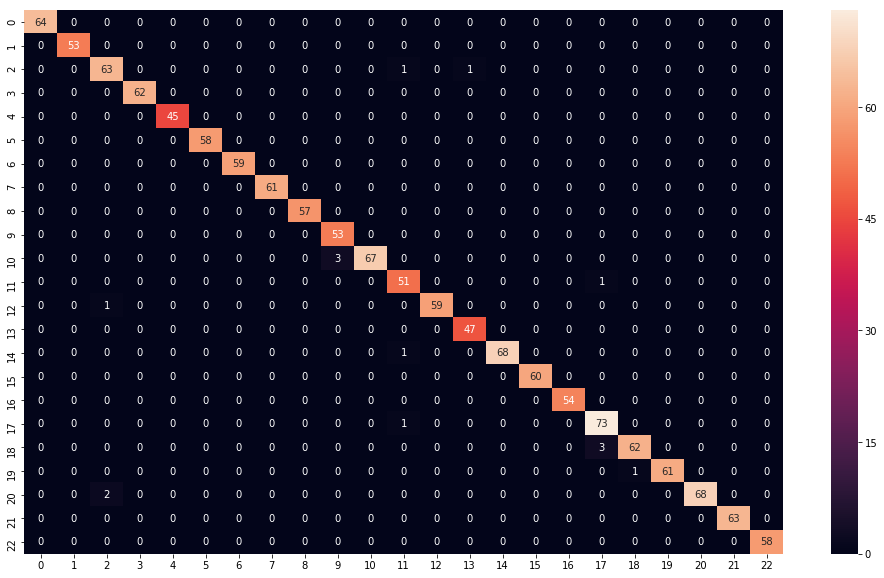

In [20]:
predicted_classes = np.argmax(net.predict(X_test), axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (17,10))
sns.heatmap(cm, annot=True);

In [21]:
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O',
           'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Neutral']

from sklearn.metrics import classification_report
num_classes = 23
target_names = ["Letter {}".format(letters[i]) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

                precision    recall  f1-score   support

      Letter A       1.00      1.00      1.00        64
      Letter B       1.00      1.00      1.00        53
      Letter C       0.95      0.97      0.96        65
      Letter D       1.00      1.00      1.00        62
      Letter E       1.00      1.00      1.00        45
      Letter F       1.00      1.00      1.00        58
      Letter G       1.00      1.00      1.00        59
      Letter I       1.00      1.00      1.00        61
      Letter L       1.00      1.00      1.00        57
      Letter M       0.95      1.00      0.97        53
      Letter N       1.00      0.96      0.98        70
      Letter O       0.94      0.98      0.96        52
      Letter P       1.00      0.98      0.99        60
      Letter Q       0.98      1.00      0.99        47
      Letter R       1.00      0.99      0.99        69
      Letter S       1.00      1.00      1.00        60
      Letter T       1.00      1.00      1.00  

In [22]:
net.save('Libras_Classifier_netV3')
loaded_net = tf.keras.models.load_model('Libras_Classifier_netV3')
loaded_net.summary()

INFO:tensorflow:Assets written to: Libras_Classifier_netV3\assets
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5504      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 64)                16448     
                                                        

In [23]:
def hand_detection(frame, bboard, results, mpDraw, mpHands):
    
    for handLandmarks in results.multi_hand_landmarks:
            
        landmarks_list = []
        lm_list_not_scaled = []
            
        for id, lm in enumerate(handLandmarks.landmark):
            h, w, c = frame.shape
            cX, cY  = int(lm.x*w), int(lm.y*h)
                
            cv2.circle(frame, (cX, cY), 6, (205, 0, 0), cv2.FILLED)
            cv2.putText(frame, '{}'.format(id), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (150, 0, 0), 1)
                
            cv2.circle(bboard, (cX, cY), 6, (205, 0, 0), cv2.FILLED)
            cv2.putText(bboard, '{}'.format(id), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 1)
                
            landmarks_list.append([id, cX, cY])
            lm_list_not_scaled.append([id, lm.x, lm.y])
            
        mpDraw.draw_landmarks(frame, handLandmarks, mpHands.HAND_CONNECTIONS)
        mpDraw.draw_landmarks(bboard, handLandmarks, mpHands.HAND_CONNECTIONS)
                
        return landmarks_list, lm_list_not_scaled

In [33]:
# Testing with Video:

letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O',
           'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Neutral']

# Object Instances:
mpDraw = mp.solutions.drawing_utils
mpHands = mp.solutions.hands

hands = mpHands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.4, min_tracking_confidence=0.4)

# Load Video:
cap = cv2.VideoCapture('libras_2.mp4')
# cap = cv2.VideoCapture(0) webcam
video_fps = cap.get(cv2.CAP_PROP_FPS)

while True:
        
    start = time.time()
    
    success, frame = cap.read()
            
    if not success:
        print('Server OFF')
        break
        
    #####################################################################################################################
    
    results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    bboard = np.zeros_like(frame)    
                                
    try:
        _, lm = hand_detection(frame, bboard, results, mpDraw, mpHands)

        input_array = np.array([lm[0][1], lm[0][2], lm[1][1], lm[1][2], lm[2][1], lm[2][2],
                               lm[3][1], lm[3][2], lm[4][1], lm[4][2], lm[5][1], lm[5][2],
                               lm[6][1], lm[6][2], lm[7][1], lm[7][2], lm[8][1], lm[8][2],
                               lm[9][1], lm[9][2], lm[10][1], lm[10][2], lm[11][1], lm[11][2],
                               lm[12][1], lm[12][2], lm[13][1], lm[13][2], lm[14][1], lm[14][2],
                               lm[15][1], lm[15][2], lm[16][1], lm[16][2], lm[17][1], lm[17][2],
                               lm[18][1], lm[18][2], lm[19][1], lm[19][2], lm[20][1], lm[20][2],], dtype=np.float32)

        input_array = input_array.reshape((1,42))

        output = loaded_net.predict(input_array)
                    
        clear_output(wait=True)
        
        if (np.max(output) < 0.2):
            
            cv2.putText(bboard, 'Could Not Detect any Letter', (50, 80), cv2.FONT_HERSHEY_SIMPLEX, 1.6, (255, 255, 255), 2)

        else:
            
            letter_result = letters[int(np.argmax(output))]

            cv2.putText(bboard, 'Detected Letter: ' + letter_result + ' {}%'.format(int(100*np.max(output))), (30, 80), cv2.FONT_HERSHEY_SIMPLEX, 1.6, (255, 255, 255), 2)
        
    except:
        
        cv2.putText(bboard, 'Could Not Detect any Letter', (50, 80), cv2.FONT_HERSHEY_SIMPLEX, 1.6, (255, 255, 255), 2)
        
    frame_stack = OpCV_Utils.stackImgs([[frame, bboard]], scale = 0.5, sep_lines=True)
                
    #####################################################################################################################
    
    # Keyboard Controls:
    
    key = cv2.waitKey(1) or 0xff   
        
    if key == ord('k'):
        break
        
    if key == ord('p'):       
        cv2.waitKey(0)
        
    end = time.time()

    frame_time = (end - start) + 0.0001
    fps = np.floor(1/frame_time)
            
    cv2.putText(frame_stack, "FPS: {}".format(fps), (9,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    cv2.imshow("Output", frame_stack)
    
cv2.destroyAllWindows()
cap.release()

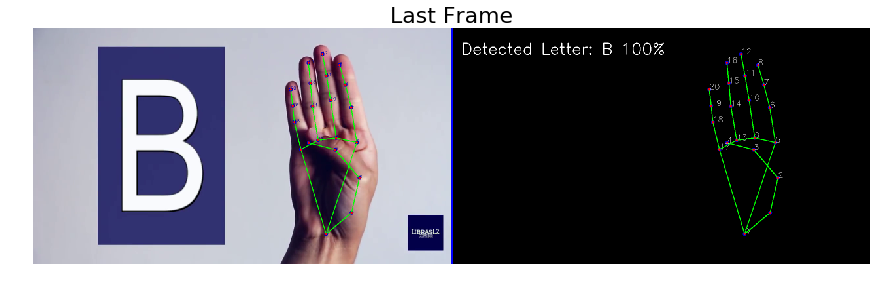

In [99]:
OpCV_Utils.show_single_img_plt(cv2.cvtColor(frame_stack, cv2.COLOR_BGR2RGB), 'Last Frame', fig_size=(15,15))

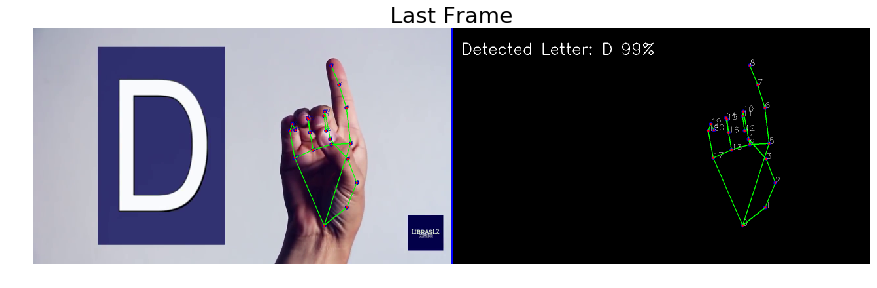

In [101]:
OpCV_Utils.show_single_img_plt(cv2.cvtColor(frame_stack, cv2.COLOR_BGR2RGB), 'Last Frame', fig_size=(15,15))

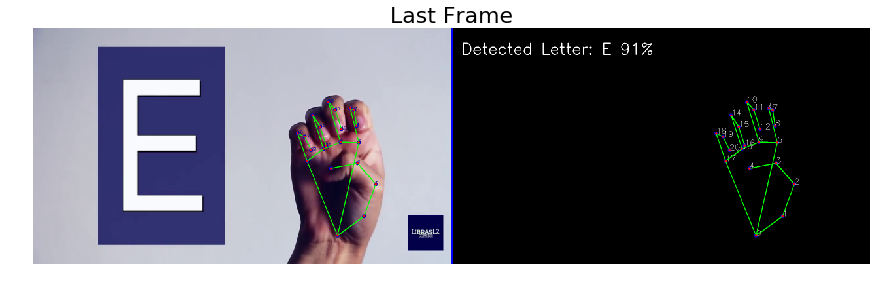

In [103]:
OpCV_Utils.show_single_img_plt(cv2.cvtColor(frame_stack, cv2.COLOR_BGR2RGB), 'Last Frame', fig_size=(15,15))

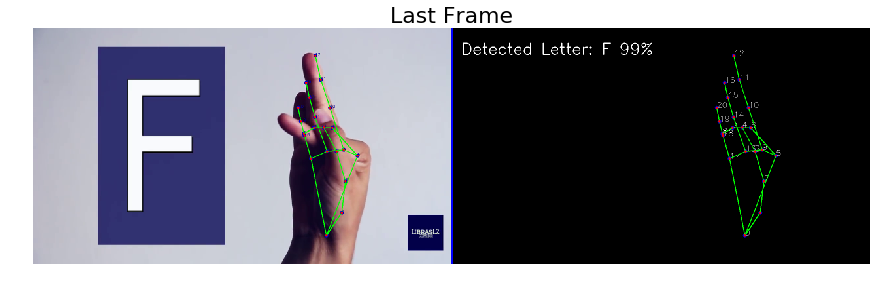

In [105]:
OpCV_Utils.show_single_img_plt(cv2.cvtColor(frame_stack, cv2.COLOR_BGR2RGB), 'Last Frame', fig_size=(15,15))

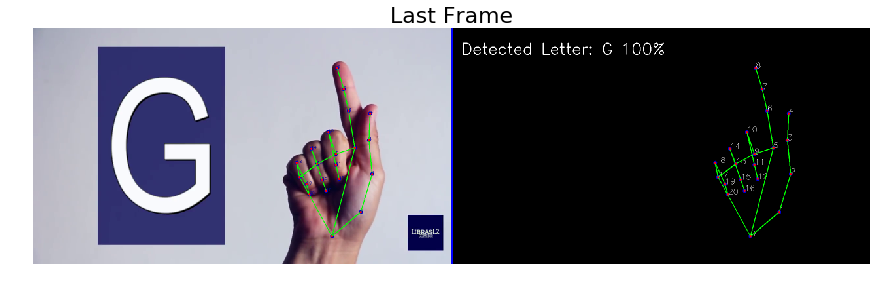

In [107]:
OpCV_Utils.show_single_img_plt(cv2.cvtColor(frame_stack, cv2.COLOR_BGR2RGB), 'Last Frame', fig_size=(15,15))